In [1]:
import rasterio
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry import box
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

In [2]:
def read_geotiff(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.meta

In [3]:
def calculate_rmse(residual):
    # Remove NaN values
    residual_no_nan = residual[~np.isnan(residual)]
    
    # Calculate squared differences
    squared_diff = np.square(residual_no_nan)
    
    # Compute mean of squared differences
    mean_squared_diff = np.mean(squared_diff)
    
    # Take square root
    rmse = np.sqrt(mean_squared_diff)
    
    return rmse

In [4]:
# Read actual and predicted GeoTIFF files
actual_east_P032_data, actual_east_P032_meta = read_geotiff('P032/merged_target_rgoff.tif')
predicted_east_P032_data, predicted_east_P032_meta = read_geotiff('P032/merged_pred_rgoff.tif')

actual_north_P032_data, actual_north_P032_meta = read_geotiff('P032/merged_target_azoff.tif')
predicted_north_P032_data, predicted_north_P032_meta = read_geotiff('P032/merged_pred_azoff.tif')

# Calculate residual
residual_east_P032 = actual_east_P032_data - predicted_east_P032_data
rmse_east_P032 = calculate_rmse(residual_east_P032)
print('RMSE of east_P032: ', rmse_east_P032)
residual_north_P032 = actual_north_P032_data - predicted_north_P032_data
rmse_north_P032 = calculate_rmse(residual_north_P032)
print('RMSE of north_P032: ', rmse_north_P032)

RMSE of east_P032:  0.16903002620443225
RMSE of north_P032:  0.1923630174178763


In [5]:
actual_east_P142_data, actual_east_P142_meta = read_geotiff('P142/merged_target_rgoff.tif')
predicted_east_P142_data, predicted_east_P142_meta = read_geotiff('P142/merged_pred_rgoff.tif')

actual_north_P142_data, actual_north_P142_meta = read_geotiff('P142/merged_target_azoff.tif')
predicted_north_P142_data, predicted_north_P142_meta = read_geotiff('P142/merged_pred_azoff.tif')

# Calculate residual
residual_east_P142 = actual_east_P142_data - predicted_east_P142_data
rmse_east_P142 = calculate_rmse(residual_east_P142)
print('RMSE of east_P142: ', rmse_east_P142)
residual_north_P142 = actual_north_P142_data - predicted_north_P142_data
rmse_north_P142 = calculate_rmse(residual_north_P142)
print('RMSE of north_P142: ', rmse_north_P142)

RMSE of east_P142:  0.11004808295873585
RMSE of north_P142:  0.19733892144882995


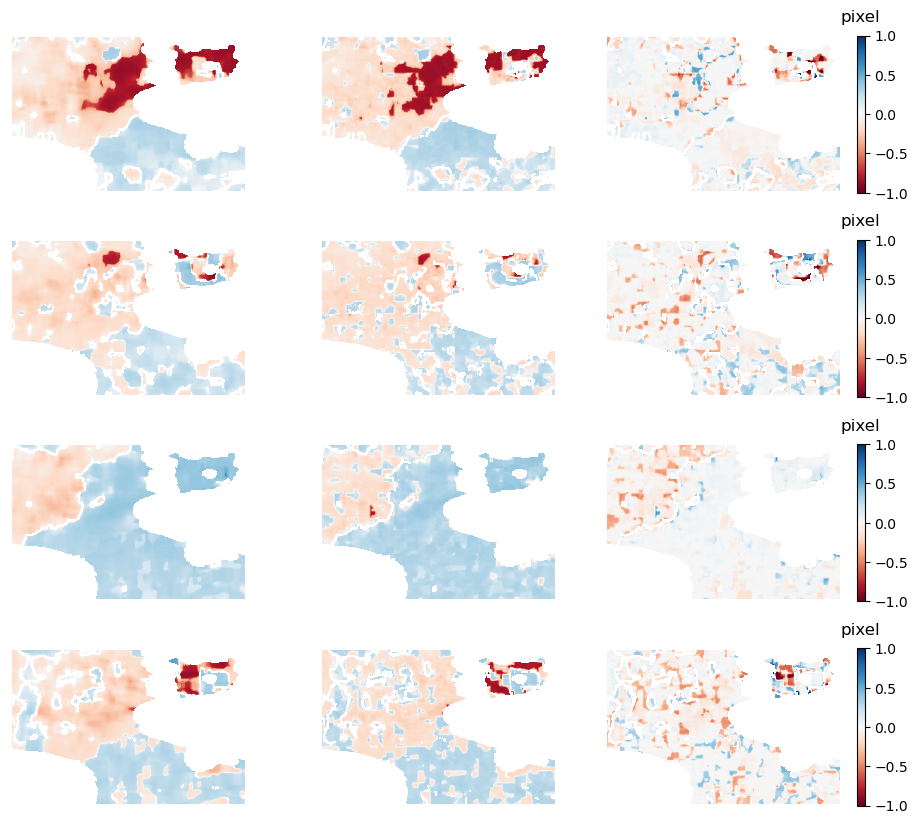

In [6]:
figname = 'Taal_Volcano.png'
pdfname = 'Taal_Volcano.pdf'
cmap = 'RdBu'    # 'RdBu', 'viridis', 'jet'

vmin = -1.
vmax = 1.

fig, ax = plt.subplots(4, 3, figsize=(12, 10), gridspec_kw={'hspace': 0.3, 'wspace': 0})

ax[0,0].imshow(actual_east_P032_data, cmap=cmap, vmin=vmin, vmax=vmax)
# ax[0,0].set_title('Actual', fontsize=20) 

# Plot predicted data
ax[0,1].imshow(predicted_east_P032_data, cmap=cmap, vmin=vmin, vmax=vmax)
# ax[0,1].set_title('Predicted', fontsize=20) 

# Plot residual
im1 = ax[0,2].imshow(residual_east_P032, cmap=cmap, vmin=vmin, vmax=vmax)
# ax[0,2].set_title('Residual', fontsize=20) 

ax[1,0].imshow(actual_north_P032_data, cmap=cmap, vmin=vmin, vmax=vmax)
# ax[1,0].set_title('Actual', fontsize=20) 

# Plot predicted data
ax[1,1].imshow(predicted_north_P032_data, cmap=cmap, vmin=vmin, vmax=vmax)
# ax[1,1].set_title('Predicted', fontsize=20) 

# Plot residual
im2 = ax[1,2].imshow(residual_north_P032, cmap=cmap, vmin=vmin, vmax=vmax)
# ax[1,2].set_title('Residual', fontsize=20) 

# P142 East plots (new)
ax[2,0].imshow(actual_east_P142_data, cmap=cmap, vmin=vmin, vmax=vmax)
ax[2,1].imshow(predicted_east_P142_data, cmap=cmap, vmin=vmin, vmax=vmax)
im3 = ax[2,2].imshow(residual_east_P142, cmap=cmap, vmin=vmin, vmax=vmax)

# P142 North plots (new)
ax[3,0].imshow(actual_north_P142_data, cmap=cmap, vmin=vmin, vmax=vmax)
ax[3,1].imshow(predicted_north_P142_data, cmap=cmap, vmin=vmin, vmax=vmax)
im4 = ax[3,2].imshow(residual_north_P142, cmap=cmap, vmin=vmin, vmax=vmax)

cbar1 = fig.colorbar(im1, ax=ax[0,2], orientation='vertical', shrink=1.)
cbar1.ax.set_title('pixel', pad=10)
cbar2 = fig.colorbar(im2, ax=ax[1,2], orientation='vertical', shrink=1.)
cbar2.ax.set_title('pixel', pad=10)
cbar3 = fig.colorbar(im3, ax=ax[2,2], orientation='vertical', shrink=1.)
cbar3.ax.set_title('pixel', pad=10)
cbar4 = fig.colorbar(im4, ax=ax[3,2], orientation='vertical', shrink=1.)
cbar4.ax.set_title('pixel', pad=10)

for row in ax:
    for subplot in row:
        subplot.set_axis_off()

plt.subplots_adjust(hspace=-0.5)  # Adjust this value as needed

plt.tight_layout()
plt.savefig(figname, bbox_inches='tight', dpi=300)
plt.savefig(pdfname, bbox_inches='tight', dpi=300)

In [7]:
def haversine_distance(lon1, lat1, lon2, lat2):
    R = 6371  # Earth's radius in kilometers
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    return R * c

def calculate_scale_bar(ax, target_distance_km):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Center of the map
    center_lon = np.mean(xlim)
    center_lat = np.mean(ylim)
    
    # Initial guess for longitude difference
    delta_lon = target_distance_km / (111.32 * np.cos(np.radians(center_lat)))
    
    # Iteratively refine the longitude difference
    for _ in range(5):  # usually converges within a few iterations
        dist = haversine_distance(center_lon, center_lat, center_lon + delta_lon, center_lat)
        delta_lon *= target_distance_km / dist
    
    return delta_lon

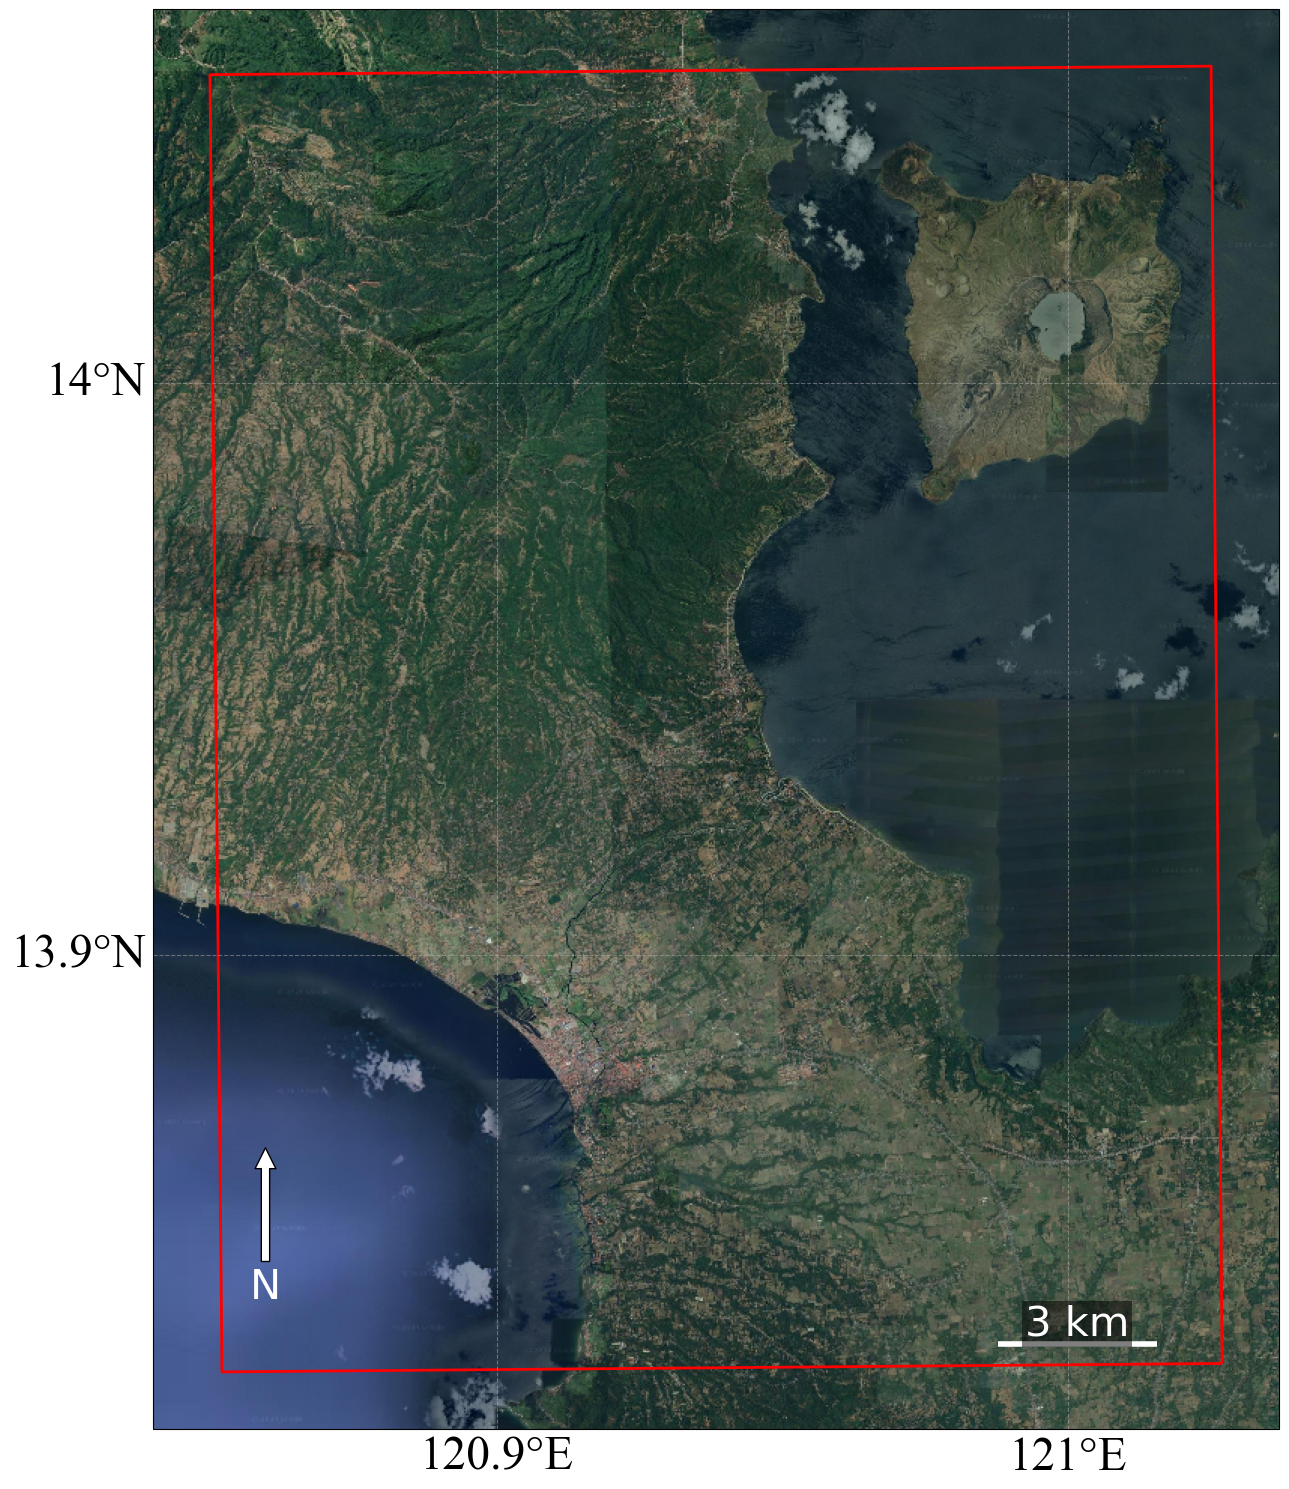

In [8]:
def get_bounding_box(meta):
    transform = meta['transform']
    width = meta['width']
    height = meta['height']
    
    # Get the coordinates of the corners
    left, top = transform * (0, 0)
    right, bottom = transform * (width, height)
    
    return box(left, bottom, right, top)

plot_buffer = 0.01

# Get bounding box
bbox = get_bounding_box(actual_east_P032_meta)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [bbox]}, crs=actual_east_P032_meta['crs'])

# Convert to WGS84
gdf_wgs84 = gdf.to_crs(epsg=4326)

# Create figure and axes with Cartopy projection
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Get the bounds of the bounding box
bounds = gdf_wgs84.total_bounds
lon_min, lat_min, lon_max, lat_max = bounds

# Add buffer to the bounds
lon_min -= plot_buffer
lon_max += plot_buffer
lat_min -= plot_buffer
lat_max += plot_buffer

# Calculate the appropriate zoom level
def calculate_zoom(lon_min, lon_max, lat_min, lat_max, img_size):
    width_ratio = (lon_max - lon_min) / 360
    height_ratio = (lat_max - lat_min) / 180
    max_ratio = max(width_ratio, height_ratio)
    zoom = int(np.ceil(np.log2(1 / max_ratio))) + 1
    return min(zoom, 18)  # Max zoom level is typically 18

zoom = calculate_zoom(lon_min, lon_max, lat_min, lat_max, max(fig.get_size_inches()))

# Add Google Earth-like tiles
google_tiles = GoogleTiles(style='satellite')
# ax.add_image(google_tiles, zoom)
ax.add_image(google_tiles, 14)

# Set the extent of the map before plotting other elements
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bounding box
gdf_wgs84.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, transform=ccrs.PlateCarree())

# Add coastlines and borders for context
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,0.1))
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,0.1))

# Increase font size of labels
gl.xlabel_style = {'size': 34, 'fontname': 'Times New Roman'}
gl.ylabel_style = {'size': 34, 'fontname': 'Times New Roman'}

# Add north arrow
x, y, arrow_length = 0.1, 0.2, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(arrowstyle='simple',facecolor='white'),
            ha='center', va='center', fontsize=30, color='white',
            xycoords=ax.transAxes)

# Add custom scale bar
target_length = 3  # km
scale_bar_position = (0.75, 0.06)  # relative position from bottom left

# Calculate the scale bar length in degrees
scale_bar_length_deg = calculate_scale_bar(ax, target_length)

# Get the axes boundaries in data coordinates
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Calculate the position of the scale bar in data coordinates
bar_left = xlim[0] + (xlim[1] - xlim[0]) * scale_bar_position[0]
bar_bottom = ylim[0] + (ylim[1] - ylim[0]) * scale_bar_position[1]

# Draw scale bar
ax.plot([bar_left, bar_left + scale_bar_length_deg], [bar_bottom, bar_bottom], 
        transform=ccrs.PlateCarree(), color='white', linewidth=4, solid_capstyle='butt')

# Add scale bar label
ax.text(bar_left + scale_bar_length_deg/2, bar_bottom, f'{target_length} km', 
        transform=ccrs.PlateCarree(), ha='center', va='bottom', color='white', fontsize=30, 
        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=2))

plt.tight_layout()
plt.savefig('Taal_GE.png', bbox_inches='tight', dpi=300)
plt.savefig('Taal_GE.pdf', bbox_inches='tight', dpi=300)